<a href="https://colab.research.google.com/github/rahiakela/automl-experiments/blob/main/automated-machine-learning-with-autokeras/01-automl-fundamentals/01_hello_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hello MNIST: Implementing first AutoKeras experiment

Our first experiment will be an image classifier using the MNIST dataset. This MINST classification task is like the "hello world" of DL. It is a classic problem of classifying images of handwritten digits into 10 categories (0 to 9). The images come from the MNIST, the most famous and widely used dataset in ML. It contains 70,000 images (60,000 for training and 10,000 for testing) collected in the 1980s by the NIST.

<img src='https://github.com/rahiakela/automl-experiments/blob/main/automated-machine-learning-with-autokeras/01-automl-fundamentals/images/1.png?raw=1' width='800'/>

AutoKeras is designed to easily classify all types of data inputs—such as structured data, text, or images—as each of them contains a specific class.

For this task, we will use ImageClassifier. This class generates and tests different models and hyperparameters, returning an optimal classifier to categorize the images of handwritten digits.

##Setup

In [ ]:
!pip3 -q install autokeras

In [2]:
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

%matplotlib inline

##Getting the dataset

We have first to download the MNIST data and have a quick look to the dataset shape.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


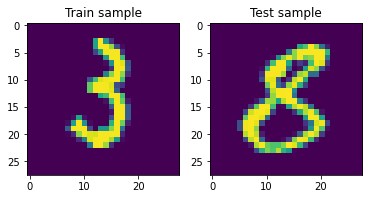

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(x_train[1234])
ax.set_title('Train sample')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()

When we are working with data sets, it is very important to check that the data is distributed homogeneously, this can be done easily using numpy functions.

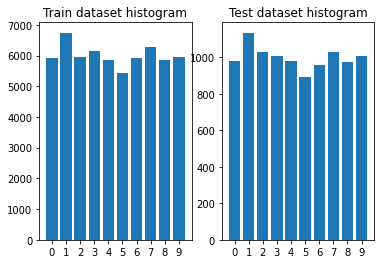

In [ ]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)

_, axs = plt.subplots(1, 2)

axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')

axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')

plt.show()

It seems homogeneous—each set of digits has similar amounts of samples, so it's now time to create our model.

## Creating an image classifier

We will now use the AutoKeras `ImageClassifier` class to find the best classification model. Just for this little example, we set `max_trials` (the maximum number of different Keras models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter, to use an adaptive number of epochs automatically.

In [ ]:
# Create a image classifier object defining
img_classifier = ak.ImageClassifier(max_trials=1)

# Search for the optimal classifier for the MNIST training dataset
img_classifier.fit(x_train, y_train, epochs=20)

Trial 1 Complete [00h 44m 28s]
val_loss: 0.037242379039525986

Best val_loss So Far: 0.037242379039525986
Total elapsed time: 00h 44m 28s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/20
1875/1875 [==============================] - 182s 97ms/step - loss: 0.1597 - accuracy: 0.9520
Epoch 2/20
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0731 - accuracy: 0.9778
Epoch 3/20
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 4/20
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0528 - accuracy: 0.9835
Epoch 5/20
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0453 - accuracy: 0.9859
Epoch 6/20
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 7/20
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0394 - accuracy: 0.9873
Epoch 8/20
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 9/20
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 10/20
1875/1875 [==============================] 

INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


We can also see that the precision increases in each epoch, so if we increase the number of epochs we would have a more precise model, although it would also take longer to finish. It is also important to take into account that after a high number of epochs, the model will usually stop learning.

## Evaluating the model

After training, it's time to measure the actual prediction of our model using the reserved test dataset. In this way, we can rule out that the good results obtained with the training set were due to overfitting.

In [ ]:
metrics = img_classifier.evaluate(x_test, y_test)
print(img_classifier)

313/313 [==============================] - 9s 27ms/step - loss: 0.0385 - accuracy: 0.9897


We can see here that there is really good prediction accuracy using our test dataset (98.8%), considering that we only spent a couple of minutes in the training phase.

Lets see how is predicting this single sample?

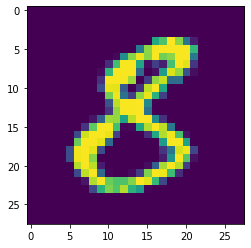

In [ ]:
fig = plt.figure()
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()

In [ ]:
# First we print the true value from the label dataset
print(x_test[1234])
# Now we print the predicted value using our classifier
print(img_classifier.predict(x_test[1234, None]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 184
  254 211  97  19   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 212 252 253
  253 253 253 169   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5 126 209 248 210 253 201
  211 253 253 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  33 178 253 253 152   8  47  21
  179 253 244  40   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 168 253 253 253  85   

We can see that the output matches the true value, so our classifier has predicted this correctly.

## Visualizing the model

We are now exporting our classifier model to Keras so that we can see a little summary, with the architecture of the best generated model found.

In [ ]:
model = img_classifier.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

If you do not have experience in Keras or Tensorflow this output will be a bit confusing, but don't worry—it's not necessary to understand it to use AutoKeras because the tool does all the work, abstracting us from these details, but it's always good to know how it works.

Each layer performs a transformation operation of the input data, passing the transformed data to the next layer.

There is a more graphical way to visualize the model.

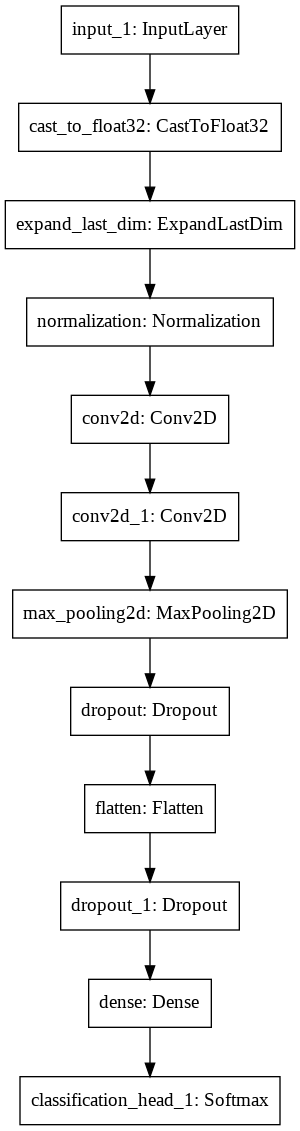

In [ ]:
plot_model(img_classifier.export_model())

In the preceding diagram, each block represents a layer and the output of each is connected to the input of the next, except the first block (whose input is the image) and the last block (whose output is the prediction).

##Creating an image regressor

Now, we will use a different approach to figure out the digit values from the image: **a regression model call regressor**.

The image regressor will try to predict the scalar value of the digit, instead to classify it in a 0-9 a category.

AutoKeras has already a special class ready to use called ImageRegressor, that will find the best regression model.

As we did with the classifier, for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [ ]:
# First, we initialize the image regressor
img_regressor = ak.ImageRegressor(overwrite=True, max_trials=1)

# Now, feed the image regressor with the training dataset
img_regressor.fit(x_train, y_train, epochs=20)

# Predict with the best model found.
predicted_y = img_regressor.predict(x_test)

# Finally, evaluate the best model with testing dataset.
img_regressor.evaluate(x_test, y_test)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|False             |?                 
image_block_1/a...|False             |?                 
image_block_1/b...|resnet            |?                 
image_block_1/r...|False             |?                 
image_block_1/r...|resnet152         |?                 
image_block_1/r...|False             |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/20
1065/1500 [====================>.........] - ETA: 47:11 - loss: 3.2260 - mean_squared_error: 3.2260

After 20 minutes, the best model found has a mean square error (MSE) rate of 0.083, which isn't bad. MSE is a widely used metric for measuring performance in regression models.

Let's predict the first 10 digits of the test dataset with the best model found, and print the predicted and true values to compare them.

In [ ]:
# Predict with the best model found the first 10 digits.
predicted_y = img_regressor.predict(x_test[:10])
# Print the first 10 true values
print(list(y_test[:10]))
# Print the predicted values to compare
print([round(float(i)) for i in predicted_y])

Notice that we have rounded up the float values returned by the regressor to compare them to the true values. This is done because regressors always return continuous values that they approximate to the real value, so if we want to predict discrete values (0 to 9 digits), we have to do a rounding to return the predicted value.

As you can see it's predinting the true value in everyone of the cases. Let's see it in a more graphical way.

In [ ]:
fig = plt.figure()
for i, v in enumerate(predicted_y):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_axis_off()
  ax.set_title(round(float(v)))
  plt.imshow(x_test[i])
plt.show()

## Visualizing the model

In [ ]:
# First we export the model to a keras model
model = img_regressor.export_model()

# Now, we ask for the model Sumary:
model.summary()

In [ ]:
plot_model(reg.export_model())